# Final Project

The premise is can we build functionality using agents to solve a number of financial modeling use cases.
These are things that a Junior FP&A (financial Planning and Analysis) Employee should be able to solve.


**Jobs to be done:**
- Information Recall from Financial Model
- Answer a 'what-if' question
- Answer a 'sensitivity' analysis question


## Table of Contents:

- **INFORMATION RECALL :** LangGraph Fundamentals & Building Agents from Scratch
  - 

- **WHAT IF SCENARIO :** Agentic RAG with Local Models
  - 

- **SENSITIVITY :** Agentic RAG with Local Models
  - 

- **PERFORMANCE VS BENCHMARK :** Agentic RAG with Local Models
  - 

In [7]:
import sys
from pathlib import Path

# Add backend/ to path so agent imports work
_backend_dir = str(Path.cwd().parent)
if _backend_dir not in sys.path:
    sys.path.insert(0, _backend_dir)

from uuid import uuid4
from typing import Annotated, TypedDict, Literal

import nest_asyncio
nest_asyncio.apply() 
### SETENV
import os
import openai
from dotenv import load_dotenv
load_dotenv(dotenv_path=Path.cwd().parent.parent / ".env")
openai.api_key = os.getenv("OPENAI_API_KEY")
# openai.api_key = getpass("OpenAI API Key: ")
os.environ["OPENAI_API_KEY"] = openai.api_key
langchain_key = os.getenv("LANGCHAIN_API_KEY")

os.environ["LANGCHAIN_TRACING_V2"] = "true"
#os.environ["LANGCHAIN_PROJECT"] = f"AIE9 - The Agent Loop - {uuid4().hex[0:8]}"
os.environ["LANGCHAIN_PROJECT"] = "dy-final-project"
os.environ["LANGCHAIN_API_KEY"] = langchain_key


if not os.environ["LANGCHAIN_API_KEY"]:
    os.environ["LANGCHAIN_TRACING_V2"] = "false"
    print("LangSmith tracing disabled")
else:
    print(f"LangSmith tracing enabled. Project: {os.environ['LANGCHAIN_PROJECT']}")


LangSmith tracing enabled. Project: dy-final-project


In [8]:
from langchain_core.messages import BaseMessage, SystemMessage, ToolMessage
from langchain_core.tools import tool
from langgraph.prebuilt import ToolNode

### YOUR CODE HERE ###

from langgraph.checkpoint.memory import MemorySaver
import uuid
# Create a memory saver
memory = MemorySaver()
from langchain_community.document_loaders import TextLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter

from langchain_ollama import OllamaEmbeddings
from langchain_qdrant import QdrantVectorStore
from qdrant_client import QdrantClient
from qdrant_client.http.models import Distance, VectorParams



---
# Financial Analysis Multi-Agent System

This section demonstrates the multi-agent financial analysis system built with LangGraph.

## Architecture Overview

The system uses a **Supervisor Pattern** with the following components:

1. **Planner Agent** (Supervisor): Routes requests to specialist agents
2. **Information Recall Agent**: Answers questions about model structure, metrics, formulas
3. **Goal Seek Agent**: Finds optimal input values to achieve target outputs

## Memory Types

The system implements all 5 memory types from the CoALA framework:
- **Short-term**: Conversation history (via LangGraph checkpointer)
- **Long-term**: User preferences and profiles
- **Semantic**: Model facts indexed by meaning (Key Drivers, Key Results)
- **Episodic**: Past successful analyses for few-shot learning
- **Procedural**: Playbook templates that guide agent behavior

In [9]:
# Import the financial agent system
from agents.financial_agent import setup_agent, chat, chat_stream

# Configuration - credentials.json lives in backend/
GOOGLE_CREDENTIALS_PATH = os.getenv("GOOGLE_CREDENTIALS_PATH", str(Path.cwd().parent / "credentials.json"))
SPREADSHEET_URL = "https://docs.google.com/spreadsheets/d/1yopikoACz8oY32Zv9FrGhb64_PlDwcO1e02WePBr4uM/edit?gid=1218171431#gid=1218171431"

print("Financial Agent System Imports Complete!")
print(f"  Credentials: {GOOGLE_CREDENTIALS_PATH}")
print(f"  Spreadsheet: {SPREADSHEET_URL[:60]}...")

Financial Agent System Imports Complete!
  Credentials: credentials.json
  Spreadsheet: https://docs.google.com/spreadsheets/d/1yopikoACz8oY32Zv9FrG...


In [10]:
# Initialize the Financial Agent
# This sets up the multi-agent system with:
# - Supervisor for routing
# - Information Recall agent
# - Goal Seek agent
# - Memory store (semantic, episodic, procedural)
# - LangGraph checkpointer for conversation memory

# Configure tab names for this specific spreadsheet
# (Your spreadsheet uses "operations" instead of "M - Monthly", etc.)
TAB_CONFIG = {
    "main_monthly": "operations",  # Main operations data
    # These tabs don't exist yet - the tools will extract from "operations"
    # "model_documentation": "Model Documentation",
    # "key_drivers_results": "Key Drivers and Results",
}

setup_agent(
    credentials_path=GOOGLE_CREDENTIALS_PATH,
    spreadsheet_url=SPREADSHEET_URL,
    supervisor_model="gpt-4o",      # Better reasoning for routing
    agent_model="gpt-4o-mini",       # Cost-effective for specialists
    tab_names=TAB_CONFIG,
)

print("\n✅ Financial Agent ready for queries!")

Financial agent initialized successfully!

✅ Financial Agent ready for queries!


In [11]:
# Test Information Recall: Understanding EBITDA
print("=" * 60)
print("TEST: Information Recall - What is EBITDA?")
print("=" * 60)

response = chat("What is EBITDA and how is it calculated in this model?")
print("\nAgent Response:")
print(response)

TEST: Information Recall - What is EBITDA?
[Model Doc Reader] Reading model documentation...
[Model Doc Reader] Read 35 characters of documentation.
[Supervisor] Routing to: recall
  Reason: The user is asking about the definition and calculation of EBITDA within the model, which falls under the category of understanding metrics and formulas. The 'recall' agent is best suited for providing information about model facts, key drivers, key results, and formulas.
[Recall Agent] Processing request...
[Recall Agent] Generated response.
[Recall Agent] Processing request...
[Recall Agent] Generated response.
[Recall Agent] Processing request...
[Recall Agent] Generated response.
[Recall Agent] Processing request...
[Recall Agent] Generated response.
[Recall Agent] Processing request...
[Recall Agent] Generated response.
[Recall Agent] Processing request...
[Recall Agent] Generated response.

Agent Response:
I am currently unable to retrieve the information regarding EBITDA from the model, incl

In [12]:
# Test Information Recall: Key Drivers
print("=" * 60)
print("TEST: Information Recall - What are the Key Drivers?")
print("=" * 60)

response = chat("What are the Key Drivers in this model and what do they control?")
print("\nAgent Response:")
print(response)

TEST: Information Recall - What are the Key Drivers?
[Model Doc Reader] Reading model documentation...
[Model Doc Reader] Read 35 characters of documentation.
[Supervisor] Routing to: recall
  Reason: The user is asking about the Key Drivers in the model and their impact, which falls under understanding the model structure and metrics. This is best handled by the 'recall' agent, who specializes in providing information about model facts, Key Drivers, Key Results, and formulas.
[Recall Agent] Processing request...
[Recall Agent] Generated response.
[Recall Agent] Processing request...
[Recall Agent] Generated response.
[Recall Agent] Processing request...
[Recall Agent] Generated response.

Agent Response:
I am currently unable to access the Key Drivers and Results or the Model Documentation. Therefore, I cannot provide specific information about the Key Drivers in this model and what they control.

If you have any other questions or need assistance with a different aspect of the financ

In [13]:
# Test Information Recall: Formula Tracing
print("=" * 60)
print("TEST: Information Recall - Formula chain for Gross Profit")
print("=" * 60)

response = chat("Trace the formula chain for Gross Profit. How is it calculated step by step?")
print("\nAgent Response:")
print(response)

TEST: Information Recall - Formula chain for Gross Profit
[Model Doc Reader] Reading model documentation...
[Model Doc Reader] Read 35 characters of documentation.
[Supervisor] Routing to: recall
  Reason: The user is asking for a detailed explanation of how Gross Profit is calculated, which involves understanding the formula and the steps involved in the calculation. This falls under the expertise of the 'recall' agent, who handles questions about metrics, formulas, and model structure.
[Recall Agent] Processing request...
[Recall Agent] Generated response.
[Recall Agent] Processing request...
[Recall Agent] Generated response.
[Recall Agent] Processing request...
[Recall Agent] Generated response.
[Recall Agent] Processing request...
[Recall Agent] Generated response.
[Recall Agent] Processing request...
[Recall Agent] Generated response.
[Recall Agent] Processing request...
[Recall Agent] Generated response.

Agent Response:
I am currently unable to access the necessary data to trac

In [14]:
# Test Goal Seek: Optimize EBITDA
print("=" * 60)
print("TEST: Goal Seek - Increase EBITDA by 10%")
print("=" * 60)

response = chat("""I want to increase EBITDA by 10% while keeping Cash above $1M. 
What Key Drivers should I adjust? Give me your top 3 recommendations.""")
print("\nAgent Response:")
print(response)

TEST: Goal Seek - Increase EBITDA by 10%
[Model Doc Reader] Reading model documentation...
[Model Doc Reader] Read 35 characters of documentation.
[Supervisor] Routing to: goal_seek
  Reason: The user is asking for recommendations on which Key Drivers to adjust in order to achieve a specific target for EBITDA while maintaining a constraint on Cash. This is an optimization problem where the goal is to find the optimal values of inputs (Key Drivers) to achieve desired outputs (Key Results). Therefore, the 'goal_seek' specialist is best suited to handle this request.
[Goal Seek Agent] Processing optimization request...
[Goal Seek Agent] Generated response.
[Goal Seek Agent] Processing optimization request...
[Goal Seek Agent] Generated response.
[Goal Seek Agent] Processing optimization request...
[Goal Seek Agent] Generated response.
[Goal Seek Agent] Processing optimization request...
[Goal Seek Agent] Generated response.
[Goal Seek Agent] Processing optimization request...
[Goal Seek A

In [15]:
# Test Goal Seek: Multi-objective optimization
print("=" * 60)
print("TEST: Goal Seek - Multiple targets")
print("=" * 60)

response = chat("""Help me achieve these goals:
1. Grow Gross Sales by 10% year over year
2. Increase EBITDA to at least $1.5M
3. Maintain Cash balance above $1M

What combination of Key Driver changes would accomplish this?""")
print("\nAgent Response:")
print(response)

TEST: Goal Seek - Multiple targets
[Model Doc Reader] Reading model documentation...
[Model Doc Reader] Read 35 characters of documentation.
[Supervisor] Routing to: goal_seek
  Reason: The user is asking for a combination of Key Driver changes to achieve specific financial targets, such as growing Gross Sales by 10%, increasing EBITDA to at least $1.5M, and maintaining a Cash balance above $1M. This requires finding optimal values for the Key Drivers to meet these goals, which is a task suited for the 'goal_seek' agent.
[Goal Seek Agent] Processing optimization request...
[Goal Seek Agent] Generated response.
[Goal Seek Agent] Processing optimization request...
[Goal Seek Agent] Generated response.
[Goal Seek Agent] Processing optimization request...
[Goal Seek Agent] Generated response.
[Goal Seek Agent] Processing optimization request...
[Goal Seek Agent] Generated response.
[Goal Seek Agent] Processing optimization request...
[Goal Seek Agent] Generated response.
[Goal Seek Agent] 

In [16]:
# Test Conversation Memory: Multi-turn interaction
print("=" * 60)
print("TEST: Conversation Memory - Multi-turn")
print("=" * 60)

# Use a specific thread_id to maintain conversation context
thread_id = str(uuid4())

# Turn 1
print("\n--- Turn 1: Ask about a metric ---")
response1 = chat("What is the current value of Gross Sales?", thread_id=thread_id)
print(f"Response: {response1}")

# Turn 2 - references previous context
print("\n--- Turn 2: Follow-up question ---")
response2 = chat("How does that compare to the previous month?", thread_id=thread_id)
print(f"Response: {response2}")

# Turn 3 - references previous context
print("\n--- Turn 3: Another follow-up ---")
response3 = chat("What Key Drivers most affect it?", thread_id=thread_id)
print(f"Response: {response3}")

TEST: Conversation Memory - Multi-turn

--- Turn 1: Ask about a metric ---
[Model Doc Reader] Reading model documentation...
[Model Doc Reader] Read 35 characters of documentation.
[Supervisor] Routing to: recall
  Reason: The user is asking for the current value of a specific metric, 'Gross Sales'. This falls under the category of questions about metrics, which is handled by the 'recall' specialist. The 'recall' agent is responsible for providing information about model facts, including current values of metrics.
[Recall Agent] Processing request...
[Recall Agent] Generated response.
[Recall Agent] Processing request...
[Recall Agent] Generated response.
[Recall Agent] Processing request...
[Recall Agent] Generated response.
[Recall Agent] Processing request...
[Recall Agent] Generated response.
Response: I am currently unable to access the necessary data to provide the current value of Gross Sales. Please check the model or provide more specific details if you have them.

--- Turn 2:

In [17]:
# Interactive Mode: Ask any question
# Modify this cell to ask your own questions!

YOUR_QUESTION = "What is the relationship between Orders and Gross Sales?"

response = chat(YOUR_QUESTION)
print(f"Question: {YOUR_QUESTION}")
print(f"\nResponse:\n{response}")

[Model Doc Reader] Reading model documentation...
[Model Doc Reader] Read 35 characters of documentation.
[Supervisor] Routing to: recall
  Reason: The user is asking about the relationship between Orders and Gross Sales, which pertains to understanding the metrics and possibly the formulas that define how these two are connected. This falls under the domain of the 'recall' agent, which handles questions about model facts, Key Drivers, Key Results, and formulas.
[Recall Agent] Processing request...
[Recall Agent] Generated response.
[Recall Agent] Processing request...
[Recall Agent] Generated response.
[Recall Agent] Processing request...
[Recall Agent] Generated response.
[Recall Agent] Processing request...
[Recall Agent] Generated response.
[Recall Agent] Processing request...
[Recall Agent] Generated response.
Question: What is the relationship between Orders and Gross Sales?

Response:
I am currently unable to access the model's data, including the Key Drivers and Results or the 

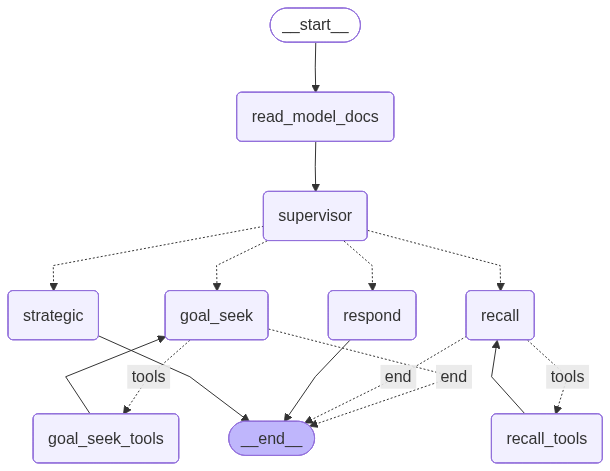

In [18]:
# Visualize the agent graph
from agents.financial_agent import _agent_instance

try:
    from IPython.display import display, Image
    display(Image(_agent_instance.get_graph().draw_mermaid_png()))
except Exception as e:
    print(f"Could not display graph image: {e}")
    print("\nGraph structure (ASCII):")
    print(_agent_instance.get_graph().draw_ascii())